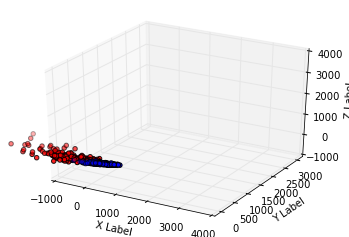

In [3]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_decomposition import PLSRegression as PLS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv("wdbc.data.txt", sep=",", skipinitialspace=True, skiprows=0, header=None)

data = df.as_matrix()

np.random.shuffle(data)

# part a
x = data[:,2:]
y = data[:,1]

pca = PCA(n_components=3)
X_r = pca.fit(x).transform(x)
target_names = ['M','B']
def f(cls):
    if cls == 'M':
        return "r"
    else:
        return "b"
c = [f(s) for s in y]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, i, target_name in zip("rb", target_names, target_names):
    ax.scatter(X_r[y == i, 0], X_r[y == i, 1], X_r[y == i, 2], c=c)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.axis('equal')
ax.set_xlim([-1000,4000])
ax.set_ylim([-1000,4000])
ax.set_zlim([-1000,4000])
plt.show()


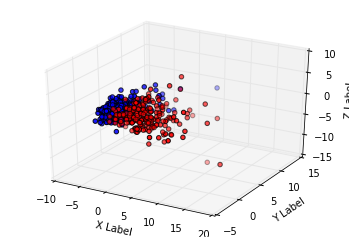

In [4]:
# part b
PLS1 = PLS(n_components=3)
number_map = {"M": 0,"B": 1}
numeric_y = np.array(map(lambda x : number_map[x],y))
result = PLS1.fit_transform(x,numeric_y)
X_r = result[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, i, target_name in zip("rb", target_names, target_names):
    ax.scatter(X_r[y == i, 0], X_r[y == i, 1], X_r[y == i, 2], c=c)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.axis('equal')


plt.show()